In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Suppress warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv("car data.csv")
df

In [50]:
df["Owner"].value_counts()

Owner
0    290
1     10
3      1
Name: count, dtype: int64

In [51]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [52]:
# Descriptive statistics
print(df.describe())

# Check unique values in categorical columns
print("Unique Fuel Types:", df['Fuel_Type'].unique())
print("Unique Seller Types:", df['Seller_Type'].unique())
print("Unique Transmissions:", df['Transmission'].unique())
print("Unique Owners:", df['Owner'].unique())


              Year  Selling_Price  Present_Price     Kms_Driven       Owner
count   301.000000     301.000000     301.000000     301.000000  301.000000
mean   2013.627907       4.661296       7.628472   36947.205980    0.043189
std       2.891554       5.082812       8.644115   38886.883882    0.247915
min    2003.000000       0.100000       0.320000     500.000000    0.000000
25%    2012.000000       0.900000       1.200000   15000.000000    0.000000
50%    2014.000000       3.600000       6.400000   32000.000000    0.000000
75%    2016.000000       6.000000       9.900000   48767.000000    0.000000
max    2018.000000      35.000000      92.600000  500000.000000    3.000000
Unique Fuel Types: ['Petrol' 'Diesel' 'CNG']
Unique Seller Types: ['Dealer' 'Individual']
Unique Transmissions: ['Manual' 'Automatic']
Unique Owners: [0 1 3]


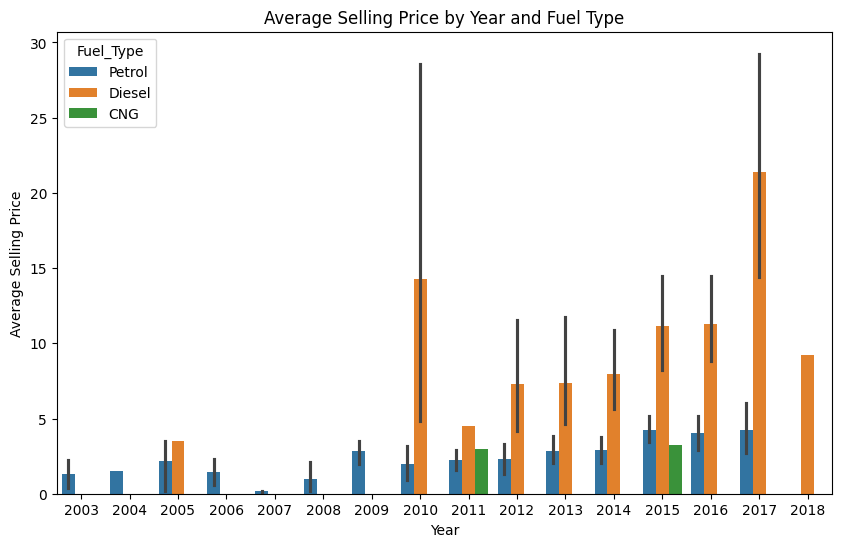

In [53]:
# Selling Price by Year
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Year', y='Selling_Price', hue='Fuel_Type')
plt.title('Average Selling Price by Year and Fuel Type')
plt.ylabel('Average Selling Price')
plt.show()


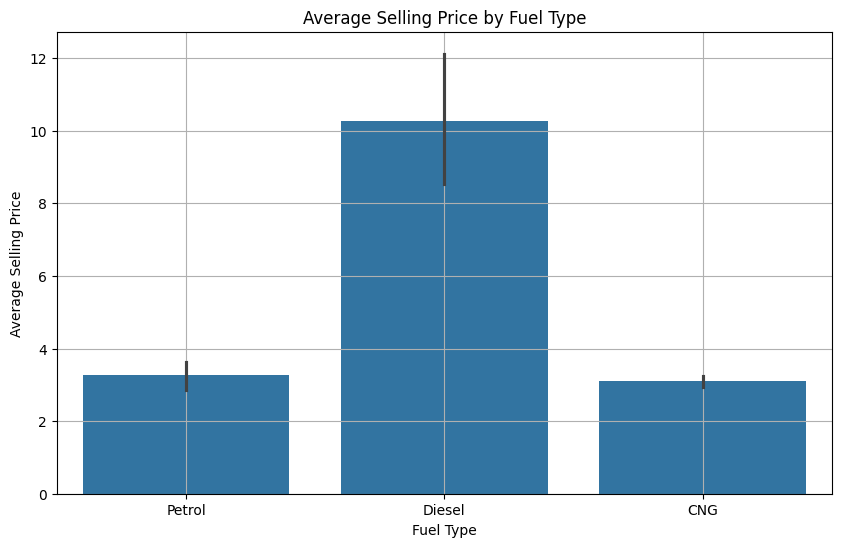

In [54]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Fuel_Type', y='Selling_Price', estimator='mean')
plt.title('Average Selling Price by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Average Selling Price')
plt.grid()
plt.show()


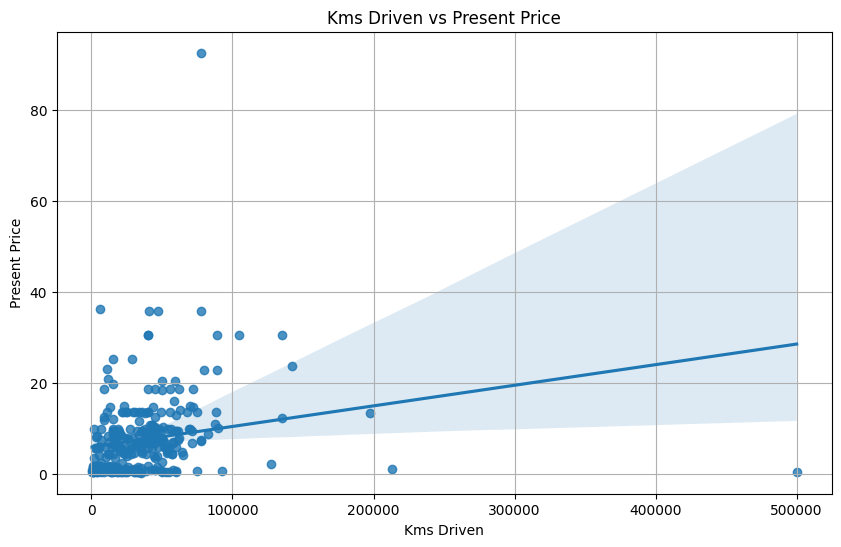

In [55]:
plt.figure(figsize=(10, 6))
sns.regplot(data=df, x='Kms_Driven', y='Present_Price', marker='o')
plt.title('Kms Driven vs Present Price')
plt.xlabel('Kms Driven')
plt.ylabel('Present Price')
plt.grid()
plt.show()

# # Kms Driven vs Selling Price Scatter Plot
# plt.figure(figsize=(10, 6))
# plt.scatter(df['Kms_Driven'], df['Selling_Price'], color='purple')
# plt.title('Selling Price vs Kms Driven', fontsize=16)
# plt.xlabel('Kms Driven', fontsize=14)
# plt.ylabel('Selling Price (in lakhs)', fontsize=14)
# plt.grid(True)
# plt.show()

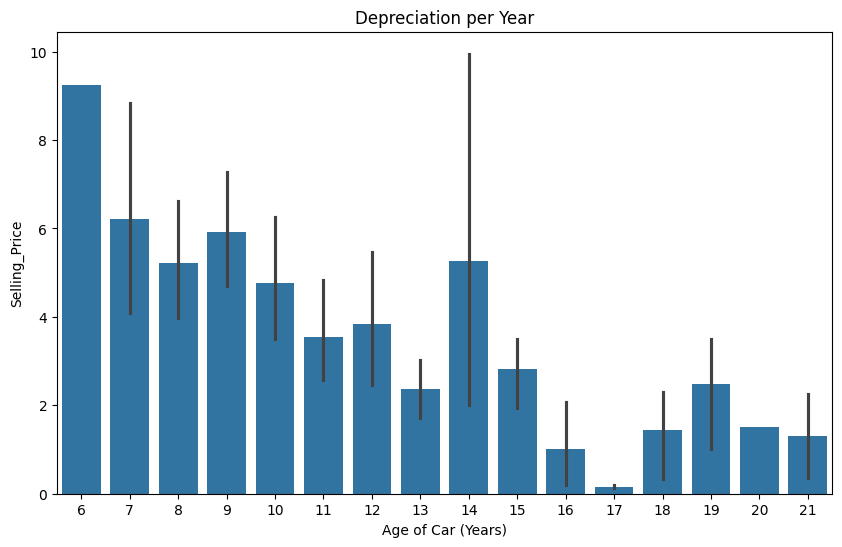

In [56]:
# Price depreciation per year
df['Age'] = 2024 - df['Year']
plt.figure(figsize=(10, 6))
sns.barplot(x='Age', y='Selling_Price', data=df)
plt.title('Depreciation per Year')
plt.xlabel('Age of Car (Years)')
plt.ylabel('Selling_Price')
plt.show()


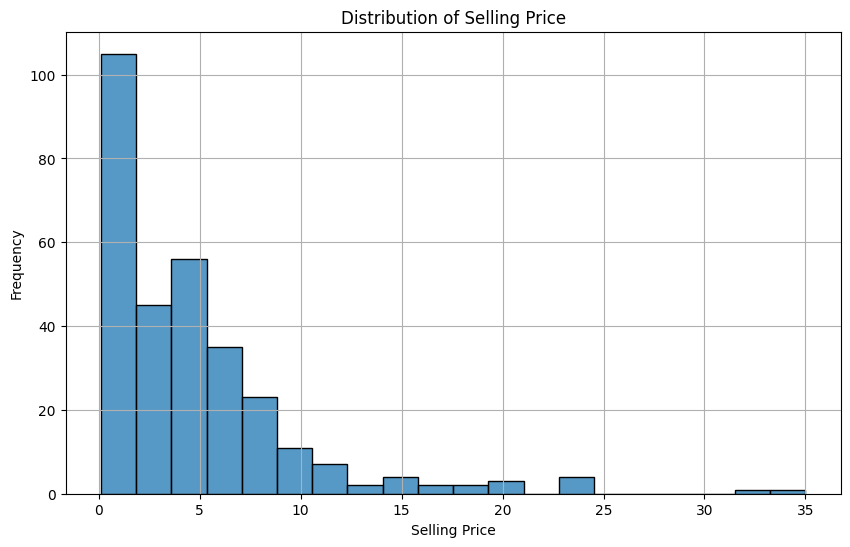

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df['Selling_Price'], bins=20)
plt.title('Distribution of Selling Price')
plt.xlabel('Selling Price')
plt.ylabel('Frequency')
plt.grid()
plt.show()


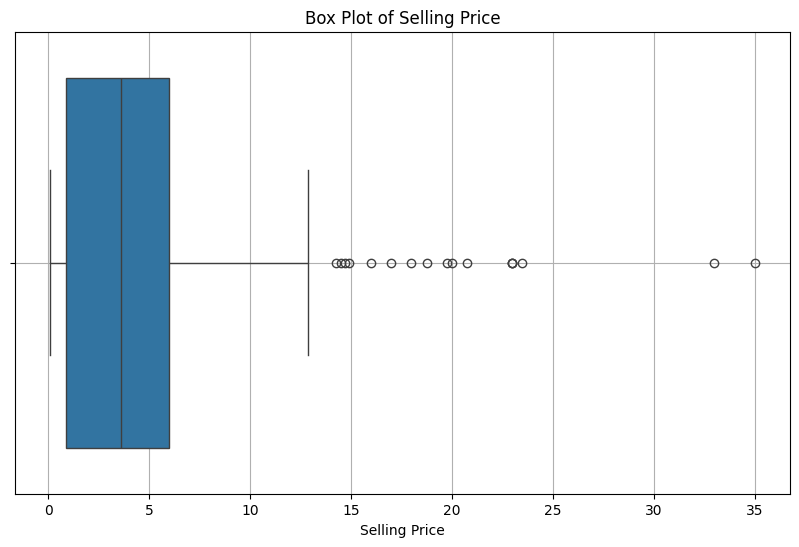

In [58]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Selling_Price'])
plt.title('Box Plot of Selling Price')
plt.xlabel('Selling Price')
plt.grid()
plt.show()


C:\Users\Priyanka\AppData\Local\Temp\ipykernel_20768\1660801939.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Fuel_Type', y='Selling_Price', data=df, palette='Set2')


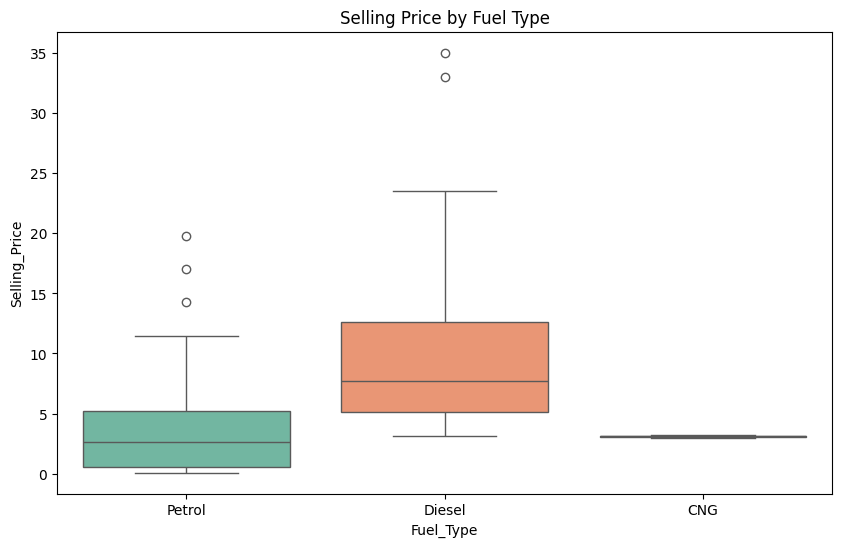

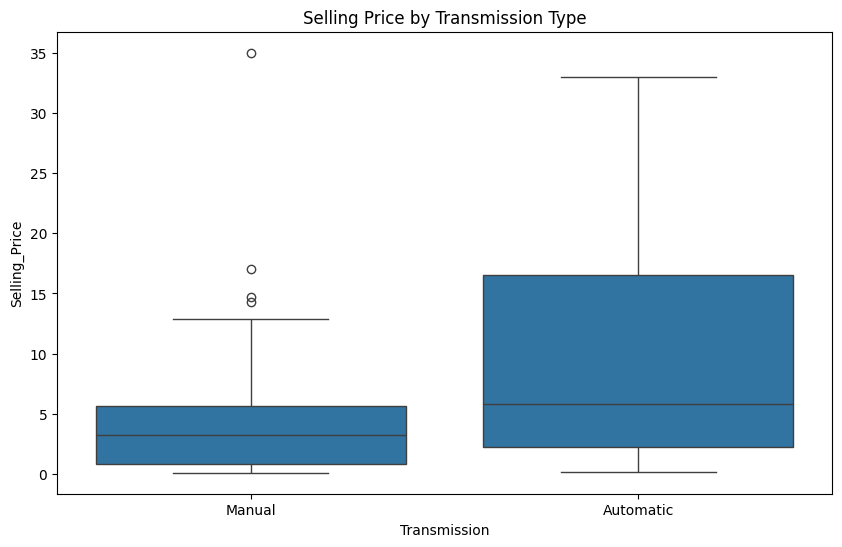

In [59]:
# Boxplot for Fuel_Type vs Selling_Price
plt.figure(figsize=(10, 6))
sns.boxplot(x='Fuel_Type', y='Selling_Price', data=df, palette='Set2')
plt.title('Selling Price by Fuel Type')
plt.show()

# Boxplot for Transmission vs Selling_Price
plt.figure(figsize=(10, 6))
sns.boxplot(x='Transmission', y='Selling_Price', data=df)
plt.title('Selling Price by Transmission Type')
plt.show()


C:\Users\Priyanka\AppData\Local\Temp\ipykernel_20768\2112273981.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Year', y='Selling_Price', data=df, palette='viridis')


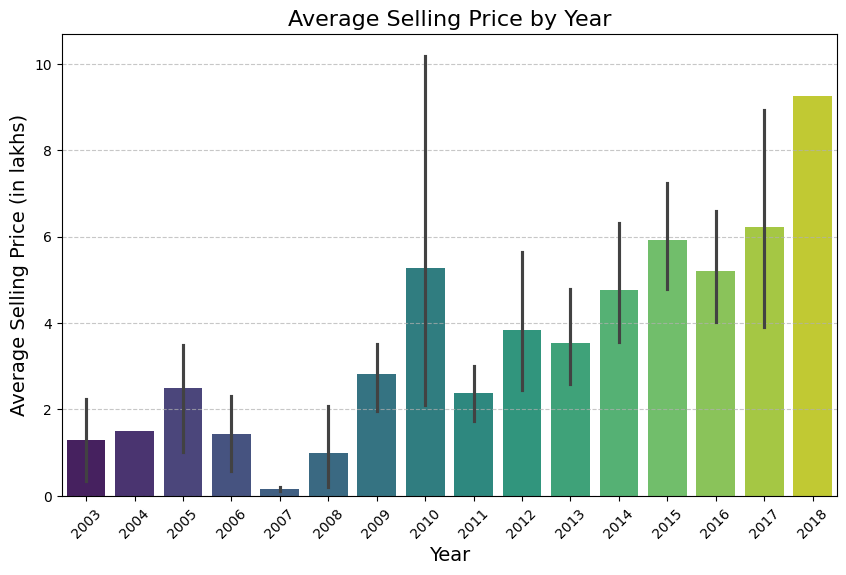

In [60]:
# Selling Price by Year Bar Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Year', y='Selling_Price', data=df, palette='viridis')
plt.title('Average Selling Price by Year', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Average Selling Price (in lakhs)', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


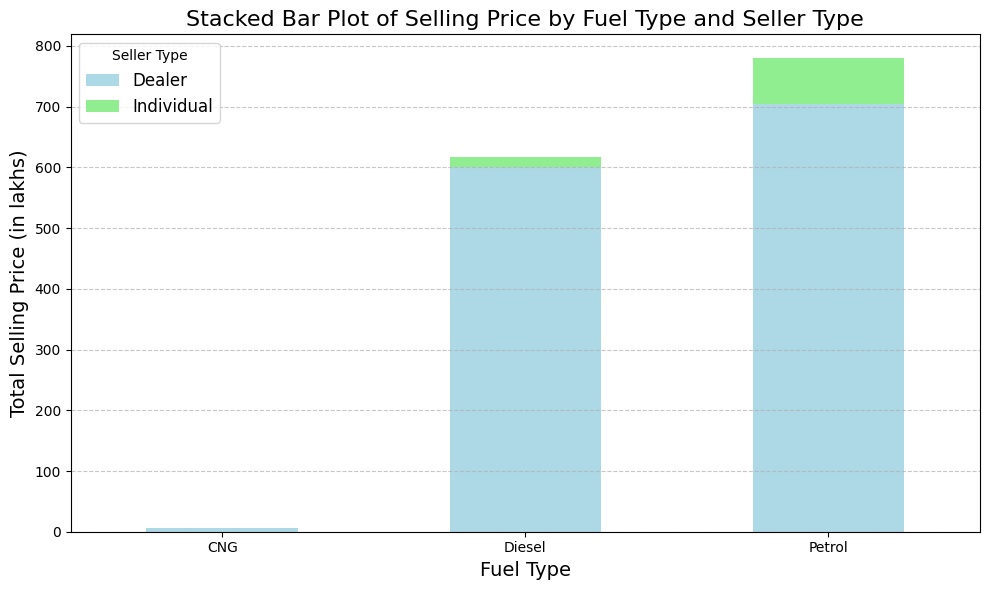

In [61]:
# Group by Fuel_Type and Seller_Type
grouped_data = df.groupby(['Fuel_Type', 'Seller_Type'])['Selling_Price'].sum().unstack()

# Plotting the stacked bar plot
ax = grouped_data.plot(kind='bar', stacked=True, figsize=(10, 6), color=['lightblue', 'lightgreen'])

# Setting titles and labels
plt.title('Stacked Bar Plot of Selling Price by Fuel Type and Seller Type', fontsize=16)
plt.xlabel('Fuel Type', fontsize=14)
plt.ylabel('Total Selling Price (in lakhs)', fontsize=14)
plt.xticks(rotation=0)
plt.legend(title='Seller Type', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

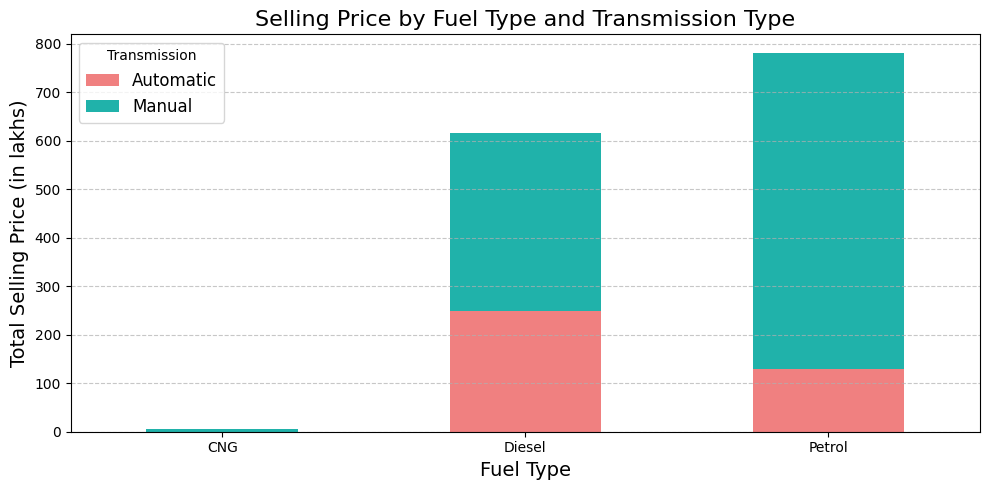

In [62]:
# Group by Fuel_Type and Transmission
grouped_fuel_transmission = df.groupby(['Fuel_Type', 'Transmission'])['Selling_Price'].sum().unstack()

# Plotting the stacked bar plot
plt.figure(figsize=(10, 5))
grouped_fuel_transmission.plot(kind='bar', stacked=True, ax=plt.gca(), color=['lightcoral', 'lightseagreen'])

plt.title('Selling Price by Fuel Type and Transmission Type', fontsize=16)
plt.xlabel('Fuel Type', fontsize=14)
plt.ylabel('Total Selling Price (in lakhs)', fontsize=14)
plt.xticks(rotation=0)
plt.legend(title='Transmission', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


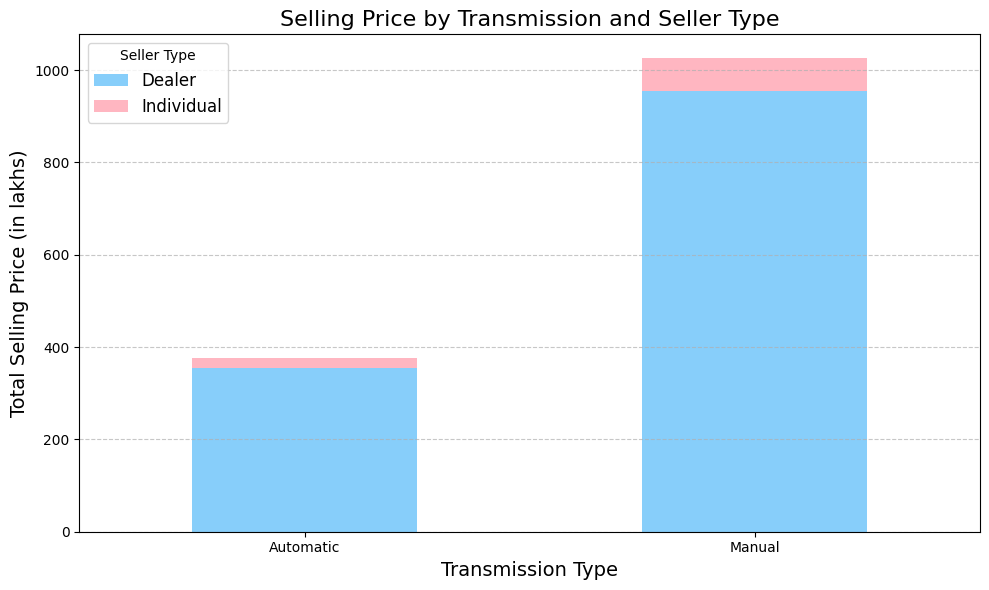

In [63]:
# Group by Transmission and Seller_Type
grouped_transmission_seller = df.groupby(['Transmission', 'Seller_Type'])['Selling_Price'].sum().unstack()

# Plotting the stacked bar plot
plt.figure(figsize=(10, 6))
grouped_transmission_seller.plot(kind='bar', stacked=True, ax=plt.gca(), color=['lightskyblue', 'lightpink'])

plt.title('Selling Price by Transmission and Seller Type', fontsize=16)
plt.xlabel('Transmission Type', fontsize=14)
plt.ylabel('Total Selling Price (in lakhs)', fontsize=14)
plt.xticks(rotation=0)
plt.legend(title='Seller Type', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


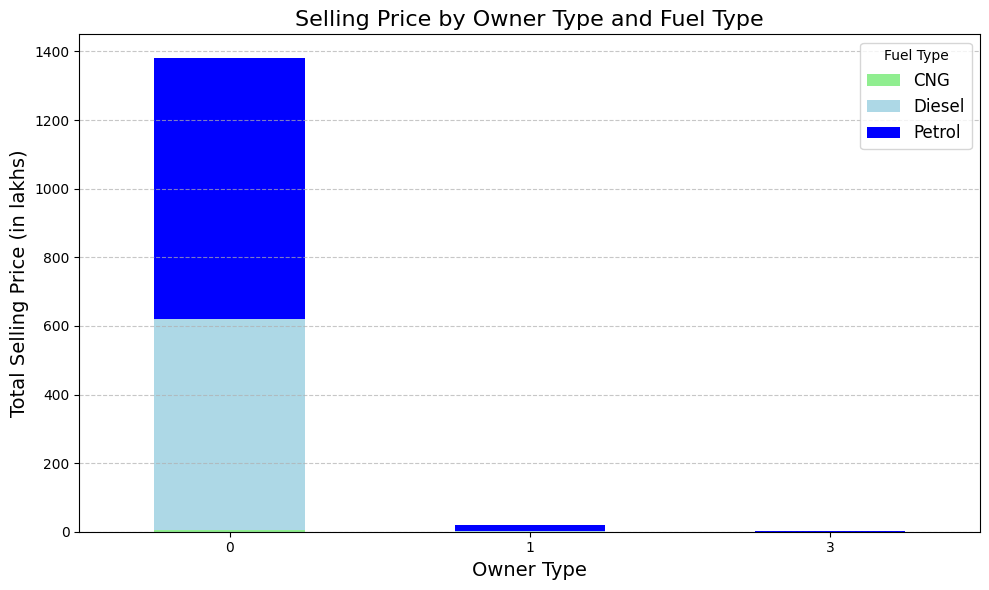

In [64]:
# Group by Owner and Fuel_Type
grouped_owner_fuel = df.groupby(['Owner', 'Fuel_Type'])['Selling_Price'].sum().unstack()

# Plotting the stacked bar plot
plt.figure(figsize=(10, 6))
grouped_owner_fuel.plot(kind='bar', stacked=True, ax=plt.gca(), color=['lightgreen', 'lightblue','blue'])

plt.title('Selling Price by Owner Type and Fuel Type', fontsize=16)
plt.xlabel('Owner Type', fontsize=14)
plt.ylabel('Total Selling Price (in lakhs)', fontsize=14)
plt.xticks(rotation=0)
plt.legend(title='Fuel Type', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


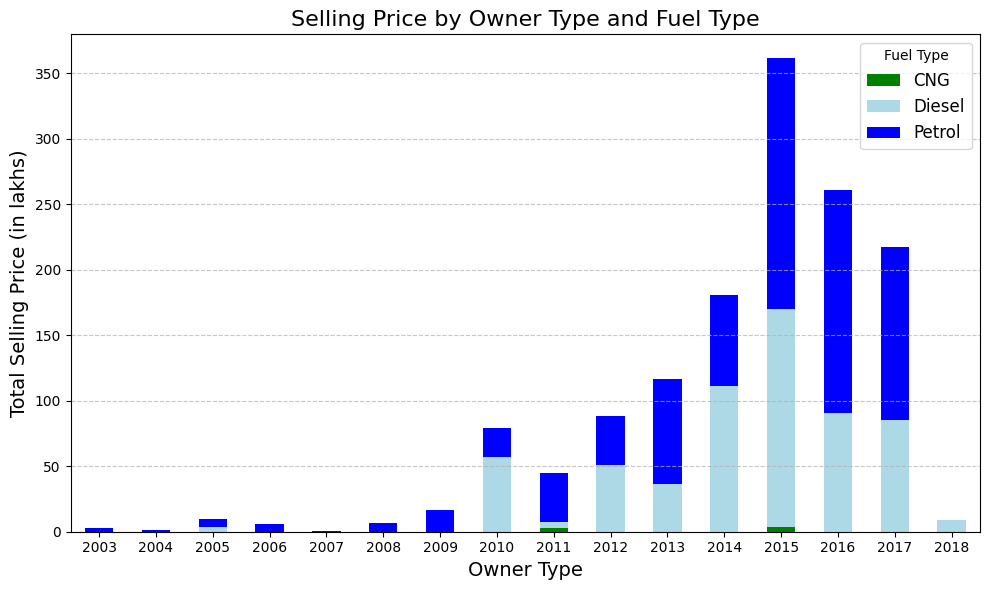

In [65]:
# Group by Owner and Fuel_Type
grouped_owner_fuel = df.groupby(['Year', 'Fuel_Type'])['Selling_Price'].sum().unstack()

# Plotting the stacked bar plot
plt.figure(figsize=(10, 6))
grouped_owner_fuel.plot(kind='bar', stacked=True, ax=plt.gca(), color=['green', 'lightblue', 'blue'])

plt.title('Selling Price by Owner Type and Fuel Type', fontsize=16)
plt.xlabel('Owner Type', fontsize=14)
plt.ylabel('Total Selling Price (in lakhs)', fontsize=14)
plt.xticks(rotation=0)
plt.legend(title='Fuel Type', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Owner
0    290
1     10
3      1
Name: count, dtype: int64


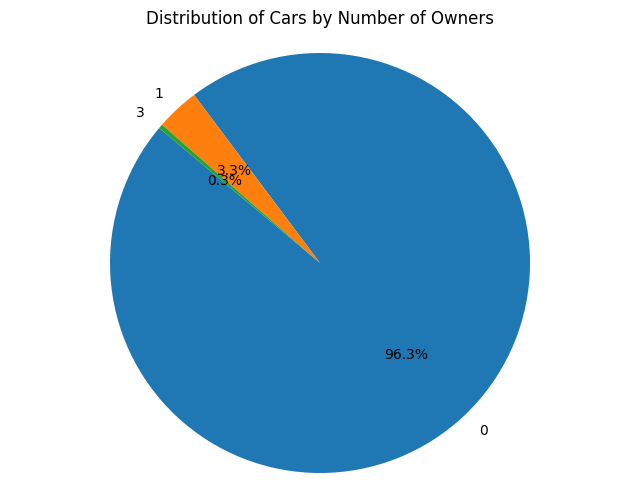

In [66]:
# Count the number of cars per owner category
owner_counts = df['Owner'].value_counts()
print(owner_counts)
import matplotlib.pyplot as plt

# Plotting the pie chart
plt.figure(figsize=(8, 6))
plt.pie(owner_counts, labels=owner_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Cars by Number of Owners')
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is circular.
plt.show()


In [67]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Initialize LabelEncoders
le_fuel = LabelEncoder()
le_seller = LabelEncoder()
le_transmission = LabelEncoder()
le_car_name = LabelEncoder()
# Apply Label Encoding
df['Fuel_Type'] = le_fuel.fit_transform(df['Fuel_Type'])
df['Seller_Type'] = le_seller.fit_transform(df['Seller_Type'])
df['Transmission'] = le_transmission.fit_transform(df['Transmission'])
df['Car_Name'] = le_car_name.fit_transform(df['Car_Name'])

# Features and target variable
X = df.drop(columns=['Selling_Price'])  
y = df['Selling_Price']


In [68]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the linear regression model again
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error with Owner: {mae}')
print(f'Mean Squared Error with Owner: {mse}')
print(f'R² Score with Owner: {r2}')

Mean Absolute Error with Owner: 1.214233941502431
Mean Squared Error with Owner: 3.534719069699602
R² Score with Owner: 0.8465539666863611
